In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderUnavailable

# carregando o df 


In [108]:
df = pd.read_csv('D:\pasta_sem_titulo\df_filtrado_atvivas\df_filtrado.csv', sep = ';')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\3161529576.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('D:\pasta_sem_titulo\df_filtrado_atvivas\df_filtrado.csv', sep = ';')


## Tirar as duplicadas baseadas no cnpj 

In [109]:
df_sem_duplicatas = df.drop_duplicates(subset=['CNPJ BÁSICO'])

In [110]:
df_sem_duplicatas['CNPJ BÁSICO'].value_counts()

CNPJ BÁSICO
72074933    1
3840974     1
2150858     1
1272240     1
5500399     1
           ..
4732675     1
1342862     1
61053070    1
7824973     1
53884195    1
Name: count, Length: 84031, dtype: int64

In [111]:
df_sem_duplicatas.columns

Index(['Unnamed: 0', 'CNPJ BÁSICO', 'RAZAO_SOCIAL/NOME_EMPRESARIAL',
       'NATUREZA_JURIDICA', 'QUALIFICAÇAO_DO_RESPONSAVEL',
       'CAPITAL_SOCIAL_DA_EMPRESA', 'PORTE_DA_EMPRESA',
       'IDENTIFICADOR MATRIZ/FILIAL', 'NOME FANTASIA', 'SITUAÇÃO CADASTRAL',
       'DATA SITUAÇÃO CADASTRAL', 'DATA DE INÍCIO ATIVIDADE',
       'CNAE FISCAL PRINCIPAL', 'CNAE FISCAL SECUNDÁRIA', 'TIPO DE LOGRADOURO',
       'LOGRADOURO', 'NÚMERO', 'COMPLEMENTO', 'BAIRRO', 'CEP', 'UF',
       'MUNICÍPIO'],
      dtype='object')

In [112]:
df_sem_duplicatas_nomes_fantasia = df_sem_duplicatas.dropna(subset=['NOME FANTASIA'])

In [113]:
df_sem_duplicatas_nomes_fantasia['NOME FANTASIA'].isna().value_counts()

NOME FANTASIA
False    27861
Name: count, dtype: int64

In [114]:
df_cnai_nomes = df_sem_duplicatas_nomes_fantasia[['CNAE FISCAL PRINCIPAL', 'NOME FANTASIA', 'CNPJ BÁSICO']]

## A porcentagem acumulada[nome fantasia] <= 0.6

In [115]:
lista_canais2 = list(df_cnai_nomes['CNAE FISCAL PRINCIPAL'].value_counts().to_dict().keys())
lista_quantidades_cnpj2 = list(df_cnai_nomes['CNAE FISCAL PRINCIPAL'].value_counts().to_dict().values())
lista_quantidade_cnpj_porcentagens2 = list(df_cnai_nomes['CNAE FISCAL PRINCIPAL'].value_counts(normalize=True).to_dict().values())

In [116]:
df_cnpj_por_cnais_ruas = pd.DataFrame({'Cnais':lista_canais2, 'Quantidades_Nomes_fantasia':lista_quantidades_cnpj2, 'Porcentagens_nomes_fantasia':lista_quantidade_cnpj_porcentagens2})

In [117]:
df_cnpj_por_cnais_ruas['porcentagens_acumuladas'] = df_cnpj_por_cnais_ruas['Porcentagens_nomes_fantasia'].cumsum()

In [118]:
df_cnpj_por_cnais_ruas

,Cnais,Quantidades_Nomes_fantasia,Porcentagens_nomes_fantasia,porcentagens_acumuladas
0,8211300,978,0.035103,0.035103
1,4781400,893,0.032052,0.067155
2,5611201,779,0.027960,0.095115
3,4120400,678,0.024335,0.119450
4,4712100,597,0.021428,0.140878
...,...,...,...,...
838,4632002,1,0.000036,0.999856
839,1610204,1,0.000036,0.999892
840,725100,1,0.000036,0.999928
841,3091101,1,0.000036,0.999964


In [119]:
df_filtrado_06 = df_cnpj_por_cnais_ruas[df_cnpj_por_cnais_ruas['porcentagens_acumuladas']<=0.6]

In [120]:
df_filtrado_06

,Cnais,Quantidades_Nomes_fantasia,Porcentagens_nomes_fantasia,porcentagens_acumuladas
0,8211300,978,0.035103,0.035103
1,4781400,893,0.032052,0.067155
2,5611201,779,0.027960,0.095115
3,4120400,678,0.024335,0.119450
4,4712100,597,0.021428,0.140878
...,...,...,...,...
59,4755502,118,0.004235,0.582965
60,9511800,115,0.004128,0.587093
61,8650004,114,0.004092,0.591185
62,4541206,108,0.003876,0.595061


In [121]:
df_mesclado = pd.merge(df_filtrado_06, df_sem_duplicatas_nomes_fantasia, how = 'inner', left_on = 'Cnais', right_on='CNAE FISCAL PRINCIPAL')

In [122]:
df_mesclado

,Cnais,Quantidades_Nomes_fantasia,Porcentagens_nomes_fantasia,porcentagens_acumuladas,Unnamed: 0,CNPJ BÁSICO,RAZAO_SOCIAL/NOME_EMPRESARIAL,NATUREZA_JURIDICA,QUALIFICAÇAO_DO_RESPONSAVEL,CAPITAL_SOCIAL_DA_EMPRESA,...,CNAE FISCAL PRINCIPAL,CNAE FISCAL SECUNDÁRIA,TIPO DE LOGRADOURO,LOGRADOURO,NÚMERO,COMPLEMENTO,BAIRRO,CEP,UF,MUNICÍPIO
0,8211300,978,0.035103,0.035103,204,72473770,NaN,NaN,NaN,NaN,...,8211300,NaN,RUA,GUILHERME ROCHA,218,SALA 804,CENTRO,60030140,CE,1389
1,8211300,978,0.035103,0.035103,728,7491318,NaN,NaN,NaN,NaN,...,8211300,NaN,AVENIDA,JORNALISTA THOMAZ COELHO,1678,NaN,MESSEJANA,60864810,CE,1389
2,8211300,978,0.035103,0.035103,1195,7993106,NaN,NaN,NaN,NaN,...,8211300,"6822600,8111700,8121400",RUA,TARCISIO BONFIM,219,NaN,PAPICU,60175335,CE,1389
3,8211300,978,0.035103,0.035103,2040,35225184,NaN,NaN,NaN,NaN,...,8211300,NaN,RUA,FRANCISCO GLICERIO,290,MT5LJ18,MARAPONGA,60711055,CE,1389
4,8211300,978,0.035103,0.035103,2220,3672939,NaN,NaN,NaN,NaN,...,8211300,NaN,RUA,CONSELHEIRO ESTELITA,130,APT 6B,CENTRO,60010260,CE,1389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16682,8513900,108,0.003876,0.598938,201745,34701800,NaN,NaN,NaN,NaN,...,8513900,"8511200,8512100",RUA,ANA BRITO,913,NaN,MONDUBIM,60765025,CE,1389
16683,8513900,108,0.003876,0.598938,203796,36519786,NaN,NaN,NaN,NaN,...,8513900,8520100,AVENIDA,BEZERRA DE MENEZES,620,A,SAO GERARDO,60325001,CE,1389
16684,8513900,108,0.003876,0.598938,217889,34561913,NaN,NaN,NaN,NaN,...,8513900,8520100,RUA,CONEGO DE CASTRO,1820,NaN,VILA PERY,60730062,CE,1389
16685,8513900,108,0.003876,0.598938,219257,44580130,NaN,NaN,NaN,NaN,...,8513900,"4761001,4781400,8511200,8520100",RUA,COSTA SOUSA,217,NaN,BENFICA,60020300,CE,1389


## df[cnpj,nome fantasia, cnai, endereco, lat, lon]

In [123]:
df_final = pd.DataFrame()

In [124]:
df_final = df_mesclado[['CNPJ BÁSICO', 'NOME FANTASIA', 'CNAE FISCAL PRINCIPAL']]

In [125]:
df_mesclado.columns

Index(['Cnais', 'Quantidades_Nomes_fantasia', 'Porcentagens_nomes_fantasia',
       'porcentagens_acumuladas', 'Unnamed: 0', 'CNPJ BÁSICO',
       'RAZAO_SOCIAL/NOME_EMPRESARIAL', 'NATUREZA_JURIDICA',
       'QUALIFICAÇAO_DO_RESPONSAVEL', 'CAPITAL_SOCIAL_DA_EMPRESA',
       'PORTE_DA_EMPRESA', 'IDENTIFICADOR MATRIZ/FILIAL', 'NOME FANTASIA',
       'SITUAÇÃO CADASTRAL', 'DATA SITUAÇÃO CADASTRAL',
       'DATA DE INÍCIO ATIVIDADE', 'CNAE FISCAL PRINCIPAL',
       'CNAE FISCAL SECUNDÁRIA', 'TIPO DE LOGRADOURO', 'LOGRADOURO', 'NÚMERO',
       'COMPLEMENTO', 'BAIRRO', 'CEP', 'UF', 'MUNICÍPIO'],
      dtype='object')

In [126]:
lista_enderecos_completos = []
for i in range(len(df_mesclado)):
    rua = str(df_mesclado['LOGRADOURO'][i])
    numero = str(df_mesclado['NÚMERO'][i])
    bairro = str(df_mesclado['BAIRRO'][i])
    # cep = str(df_mesclado['CEP'][i])
    uf = str(df_mesclado['UF'][i])
    endereco_completo = str(rua+' ,'+numero+' - '+bairro+' ,'+'FORTALEZA'+' - '+uf)
    lista_enderecos_completos.append(endereco_completo)

In [127]:
df_final['EMDERECO COMPLETO'] = lista_enderecos_completos

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\392542961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['EMDERECO COMPLETO'] = lista_enderecos_completos


In [128]:
df_final['EMDERECO COMPLETO'][0]

'GUILHERME ROCHA ,218 - CENTRO ,FORTALEZA - CE'

In [129]:
lista = []
for i  in range(len(df_final)):
    lista.append(i)

In [130]:
df_final['ID'] = lista

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\3896292336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ID'] = lista


In [131]:
df_final

,CNPJ BÁSICO,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID
0,72473770,NOVAS TENDENCIAS REPRESENTACOES COMERCIAIS,8211300,"GUILHERME ROCHA ,218 - CENTRO ,FORTALEZA - CE",0
1,7491318,VIRTUAL CARD,8211300,"JORNALISTA THOMAZ COELHO ,1678 - MESSEJANA ,FO...",1
2,7993106,CAPITANIA SERVICOS,8211300,"TARCISIO BONFIM ,219 - PAPICU ,FORTALEZA - CE",2
3,35225184,CHANGERIE,8211300,"FRANCISCO GLICERIO ,290 - MARAPONGA ,FORTALEZA...",3
4,3672939,EFICIENCE CONTABILIDADE E ASSESSORIA,8211300,"CONSELHEIRO ESTELITA ,130 - CENTRO ,FORTALEZA ...",4
...,...,...,...,...,...
16682,34701800,ESCOLA VIVER VALORES - COMECO DO CAMINHO,8513900,"ANA BRITO ,913 - MONDUBIM ,FORTALEZA - CE",16682
16683,36519786,COLEGIO 21 DE ABRIL,8513900,"BEZERRA DE MENEZES ,620 - SAO GERARDO ,FORTALE...",16683
16684,34561913,COLEGIO GURI SENIOR,8513900,"CONEGO DE CASTRO ,1820 - VILA PERY ,FORTALEZA ...",16684
16685,44580130,UNIC,8513900,"COSTA SOUSA ,217 - BENFICA ,FORTALEZA - CE",16685


In [132]:
df_lat_lon = pd.DataFrame(columns=list(df_final.columns))

In [133]:
df_final.to_csv('D:\AEY HELTH\df_final.csv', sep = ';', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\841734756.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_final.to_csv('D:\AEY HELTH\df_final.csv', sep = ';', index=False)


In [106]:
df_lat_lon.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\3559682599.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_lat_lon.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';', index=False)


In [197]:
df_final = pd.read_csv('D:\AEY HELTH\df_restantes.csv', sep = ';')
df_aleatorio = df_final.sample(n=10)
lista_latitude = []
lista_longitude = []
geolocator = Nominatim(user_agent="my_geocoder")
none = 0
for endereco in tqdm(df_aleatorio['EMDERECO COMPLETO']):
    try:
        location = geolocator.geocode(endereco)
        if location:
            latitude = location.latitude
            longitude = location.longitude
            lista_latitude.append(latitude)
            lista_longitude.append(longitude)
        else:
            lista_latitude.append(None)
            lista_longitude.append(None)
            none += 1
    except GeocoderUnavailable:
        lista_latitude.append(None)
        lista_longitude.append(None)
        none += 1
print(none) 
df_aleatorio['LAT'] = lista_latitude
df_aleatorio['LON'] = lista_longitude
df_aleatorio = df_aleatorio[df_aleatorio['LAT'].notna()]
df = pd.read_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')
df = pd.concat([df,df_aleatorio], ignore_index=True)
print(len(df))
df.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')
valores_aleatorio = df_aleatorio['ID'].unique()
valores_final = df_final['ID'].unique()
valores_restantes = list(set(valores_final) - set(valores_aleatorio))
df_final = df_final[df_final['ID'].isin(valores_restantes)]
print(len(df_final))
df_final.to_csv('D:\AEY HELTH\df_restantes.csv', sep = ';', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:30: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:30: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\2036867826.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_final = pd.read_csv('D:\AEY HELTH\df_restantes.csv', sep = ';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\2036867826.py:27: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\2036867826.py:30: SyntaxWarning: invalid escape sequence '\A'
  df.to_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\2036867826.py:36:

10
14496
2191



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\2036867826.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_aleatorio], ignore_index=True)


In [198]:
df_lat_lon = pd.read_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_17976\4188308527.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_lat_lon = pd.read_csv('D:\AEY HELTH\df_lat_lon.csv', sep = ';')


In [199]:
Q1 = df_lat_lon['LAT'].quantile(0.25)
Q3 = df_lat_lon['LAT'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df_lat_lon[(df_lat_lon['LAT'] >= limite_inferior) & (df_lat_lon['LAT'] <= limite_superior)]

(array([3.500e+01, 2.200e+01, 4.900e+01, 7.000e+01, 8.300e+01, 1.650e+02,
        1.950e+02, 1.100e+02, 1.030e+02, 1.300e+02, 1.240e+02, 2.490e+02,
        1.880e+02, 2.770e+02, 2.500e+02, 4.410e+02, 3.100e+02, 4.050e+02,
        2.470e+02, 2.260e+02, 2.480e+02, 2.410e+02, 2.350e+02, 2.720e+02,
        3.900e+02, 3.890e+02, 4.640e+02, 4.670e+02, 7.840e+02, 9.000e+02,
        1.164e+03, 1.564e+03, 1.266e+03, 8.920e+02, 7.610e+02, 2.470e+02,
        1.690e+02, 1.010e+02, 4.700e+01, 3.000e+01, 2.500e+01, 1.600e+01,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-3.8547201 , -3.85094891, -3.84717772, -3.84340653, -3.83963534,
        -3.83586415, -3.83209295, -3.82832176, -3.82455057, -3.82077938,
        -3.81700819, -3.813237  , -3.80946581, -3.80569462, -3.80192343,
        -3.79815223, -3.79438104, -3.79060985, -3.78683866, -3.78306747,
        -3.77929628, -3.77552509, -3.7717539 , -3.76798271, -3.76421152,
        -3.

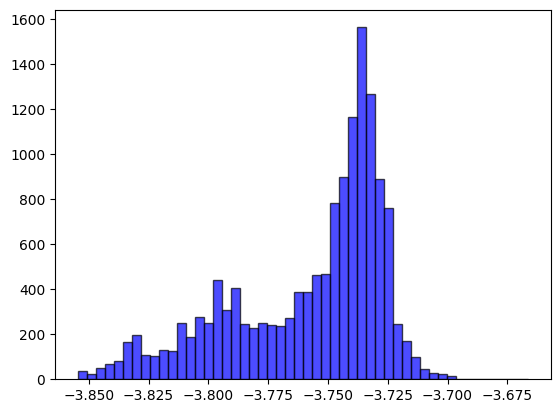

In [200]:
plt.hist(df_sem_outliers['LAT'], bins = 'auto', color='blue', alpha=0.7, edgecolor='black')

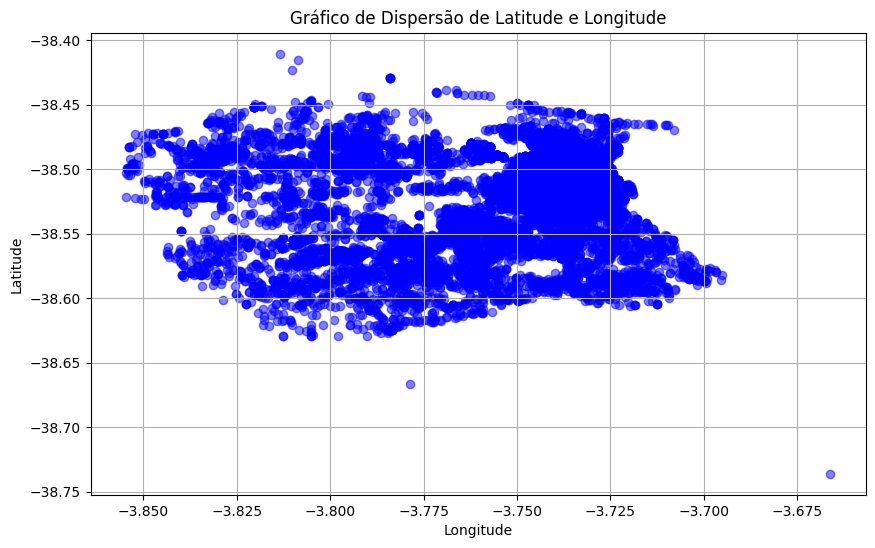

In [201]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sem_outliers['LAT'], df_sem_outliers['LON'], color='blue', alpha=0.5) 
plt.title('Gráfico de Dispersão de Latitude e Longitude') 
plt.xlabel('Longitude') 
plt.ylabel('Latitude')
plt.grid(True)
plt.show()